# IMPORTING OF LIBRARIES

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


   # LOADING OF DATASET

In [ ]:
# READING OF DATA
df = pd.read_csv('data.csv')

# DATA PRE-PROCESSING

In [ ]:
df.head() # Head of the dataset n= 5

In [ ]:
df.tail() # Tail of the data set n =5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.shape

In [9]:
df.count()

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
RiskLevel      1014
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [11]:
df.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


In [76]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [80]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# EdescribeRATORY DATA ANALYSIS 

<Figure size 2400x1600 with 0 Axes>

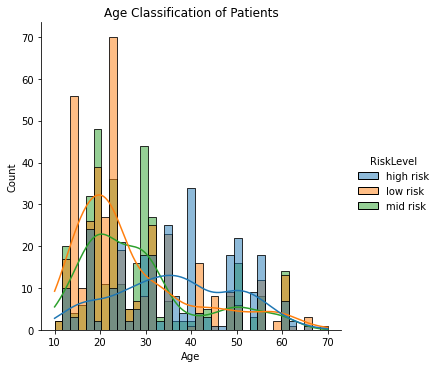

<Figure size 2400x1600 with 0 Axes>

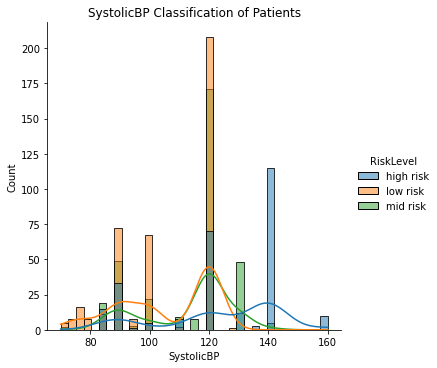

<Figure size 2400x1600 with 0 Axes>

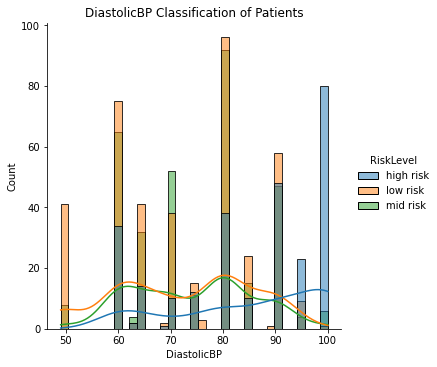

<Figure size 2400x1600 with 0 Axes>

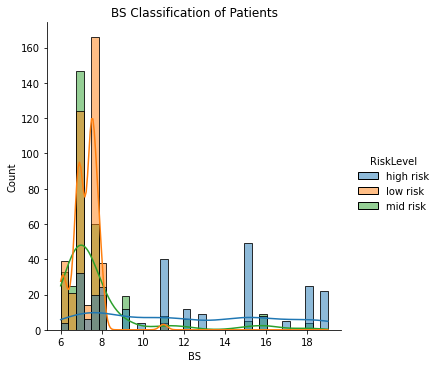

<Figure size 2400x1600 with 0 Axes>

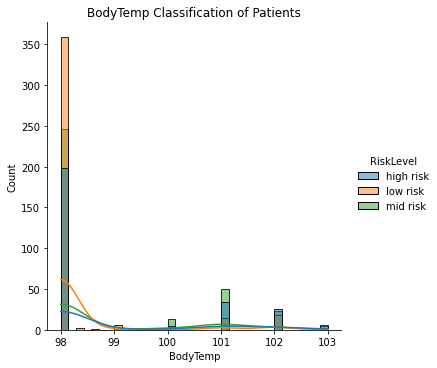

<Figure size 2400x1600 with 0 Axes>

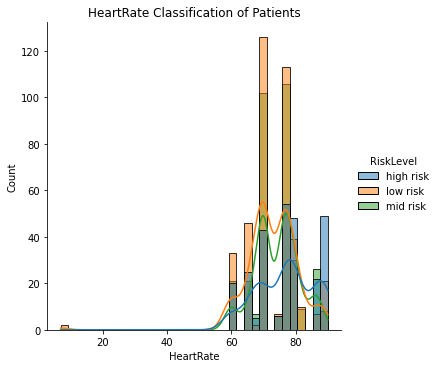

In [13]:
columns = df.columns[:len(df.columns) - 1]
for column in columns:
    plt.figure(figsize=(12,8), dpi=200)
    sns.displot(data=df, x=str(column), kde=True, hue="RiskLevel", bins=35).set(title="{} Classification of Patients".format(str(column)))
    plt.show()

[Text(0.5, 1.0, 'Risk Category')]

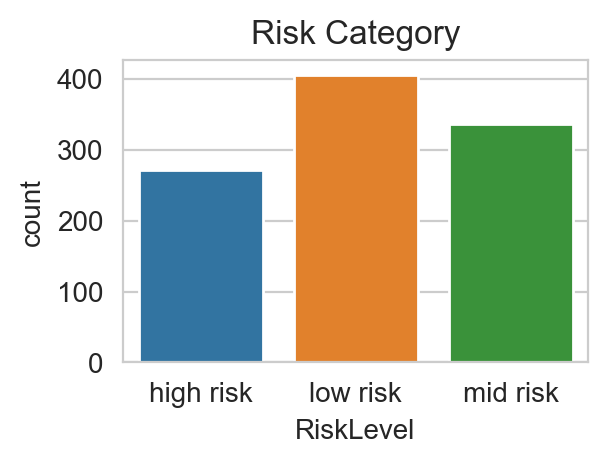

In [75]:
plt.figure(figsize=(3,2), dpi=200)
sns.countplot(data=df, x="RiskLevel").set(title="Risk Category")

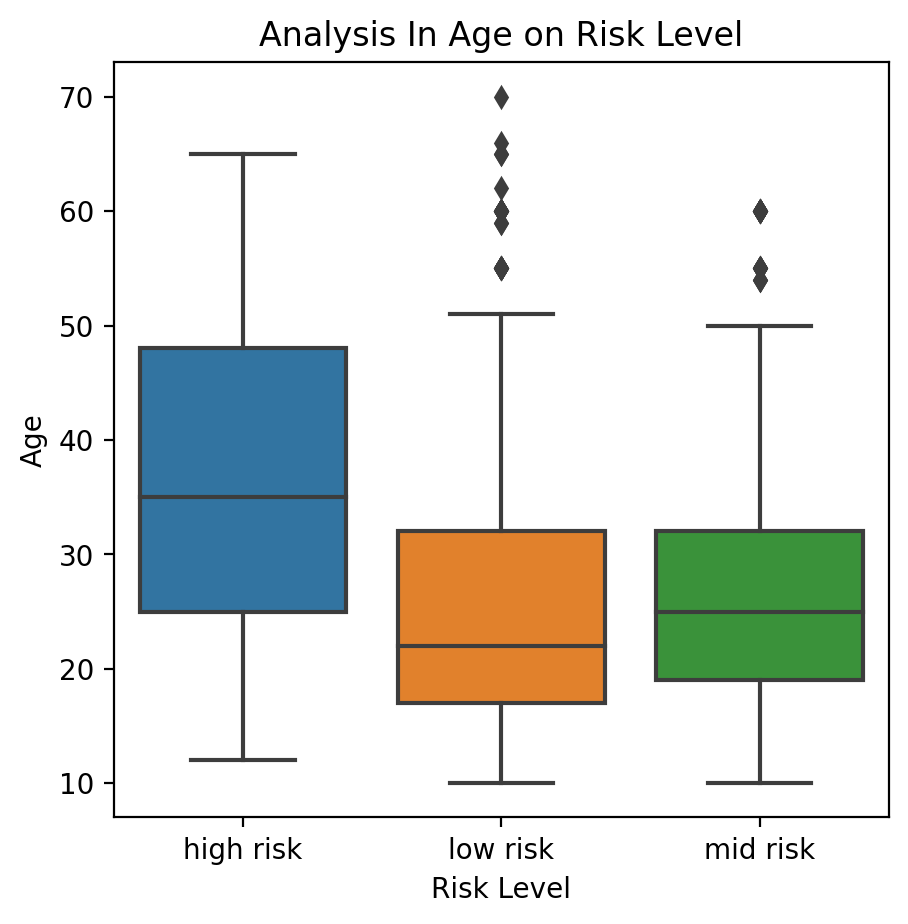

In [15]:
fig = plt.figure(figsize=(5,5), dpi=200)
sns.boxplot(x="RiskLevel", y="Age", data=df).set(title="Analysis In Age on Risk Level", xlabel="Risk Level")
plt.show()

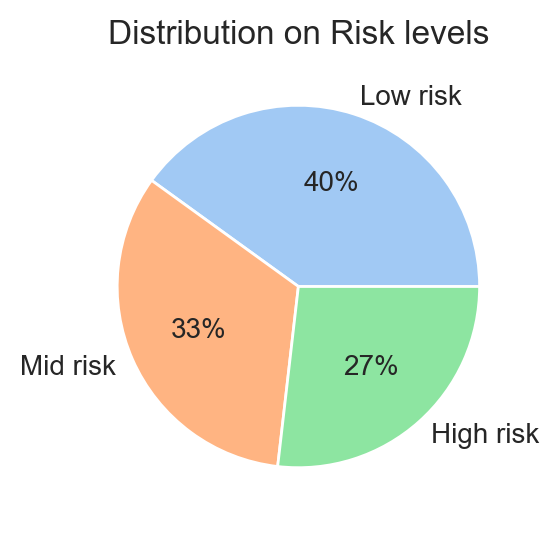

In [72]:
plt.figure(figsize=(3,3), dpi=200)
labels = ['Low risk', 'Mid risk', 'High risk']
low_risk = df[df['RiskLevel'] == 'low risk']
mid_risk = df[df['RiskLevel'] == 'mid risk']
high_risk = df[df['RiskLevel'] == 'high risk']
data = [len(low_risk), len(mid_risk), len(high_risk)]
colors = sns.color_palette('pastel')[0:5]
fig = plt.pie(x=data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Distribution on Risk levels')
plt.show()

<Figure size 2000x1600 with 0 Axes>

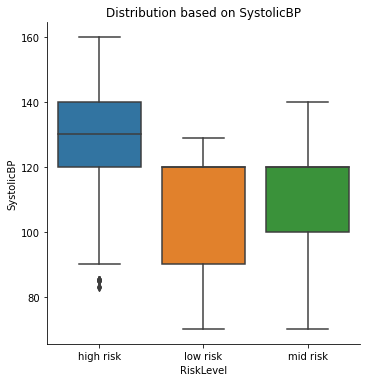

In [17]:
plt.figure(figsize=(10, 8), dpi=200)
sns.catplot(x="RiskLevel", y="SystolicBP", data=df, kind="box").set(title="Distribution based on SystolicBP")
plt.show()

<Figure size 2000x1600 with 0 Axes>

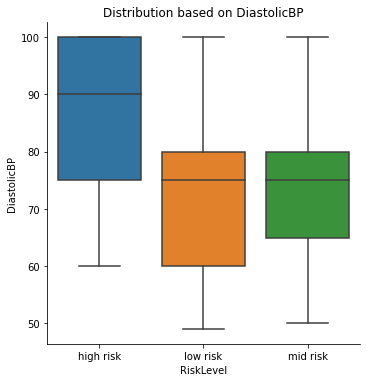

In [18]:
plt.figure(figsize=(10, 8), dpi=200)
sns.catplot(x="RiskLevel", y="DiastolicBP", data=df, kind="box").set(title="Distribution based on DiastolicBP")
plt.show()

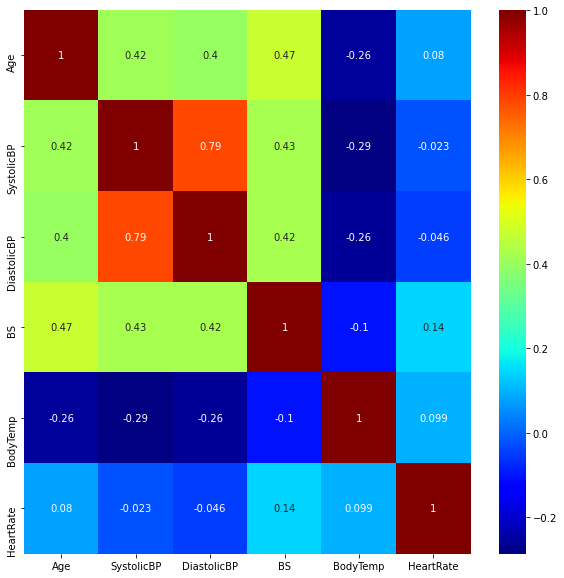

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='jet')
plt.show()

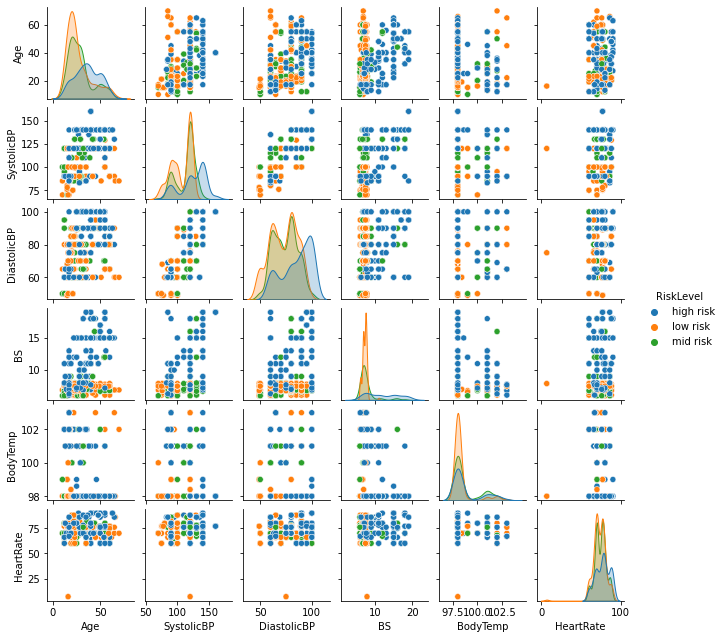

In [20]:
#Pairplot visualization with RiskLevel as hue
sns.pairplot(df,height=1.5,hue='RiskLevel')

In [7]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# DATA MODELLING

In [21]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


## TRAIN, TEST , and SPLIT DATASET

In [22]:
X = df.drop("RiskLevel", axis=1)
y = df['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# RANDOM FOREST CLASSIFICATION

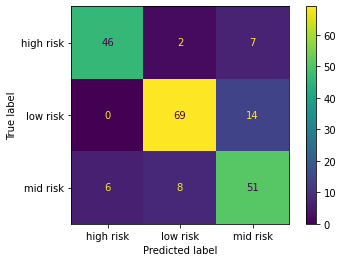

In [23]:

from sklearn.ensemble import RandomForestClassifier
randomF = RandomForestClassifier()
randomF.fit(X_train, y_train)
RandomForestClassifier()
randomF_pred = randomF.predict(X_test)
plot_confusion_matrix(randomF, X_test, y_test)

In [93]:
print(classification_report(y_test, randomF_pred))

              precision    recall  f1-score   support

   high risk       0.88      0.94      0.91        53
    low risk       0.89      0.75      0.81        88
    mid risk       0.72      0.84      0.78        62

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.83       203
weighted avg       0.84      0.83      0.83       203



In [24]:
randomF_acc = accuracy_score(y_test, randomF_pred)
accuracy_list.append(randomF_acc * 100)

In [26]:
randomF_acc

0.8177339901477833

# K-Nearest Neighbors Algorithm

In [27]:

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
knn_pred = knn.predict(scaled_X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

   high risk       0.81      0.71      0.76        55
    low risk       0.84      0.80      0.81        83
    mid risk       0.70      0.82      0.75        65

    accuracy                           0.78       203
   macro avg       0.78      0.77      0.77       203
weighted avg       0.79      0.78      0.78       203



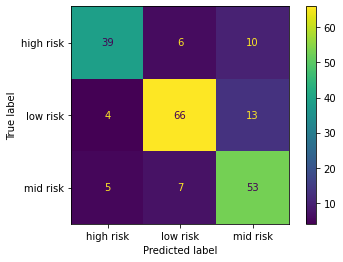

In [29]:
plot_confusion_matrix(knn, scaled_X_test, y_test)

In [30]:
knn_acc = accuracy_score(y_test, knn_pred)
accuracy_list.append(knn_acc * 100)

In [31]:
knn_acc

0.7783251231527094

# Logistic regression multiclass classification

In [32]:

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegressionCV
lg = LogisticRegressionCV()
lg.fit(scaled_X_train, y_train)

LogisticRegressionCV()

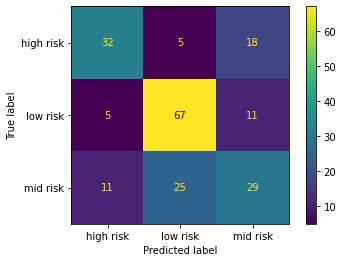

In [33]:
lg_pred = lg.predict(scaled_X_test)
plot_confusion_matrix(lg, scaled_X_test, y_test)

In [34]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

   high risk       0.67      0.58      0.62        55
    low risk       0.69      0.81      0.74        83
    mid risk       0.50      0.45      0.47        65

    accuracy                           0.63       203
   macro avg       0.62      0.61      0.61       203
weighted avg       0.62      0.63      0.62       203



In [35]:
lg_acc = accuracy_score(y_test, lg_pred)
accuracy_list.append(lg_acc * 100)

In [36]:
lg_acc

0.6305418719211823

# Support Vector Machine

In [37]:

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
svc = SVC(decision_function_shape='ovo', class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced',
                           decision_function_shape='ovo'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [38]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

In [39]:
svc_pred = grid.predict(scaled_X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

   high risk       0.72      0.80      0.76        55
    low risk       0.69      0.73      0.71        83
    mid risk       0.56      0.46      0.50        65

    accuracy                           0.67       203
   macro avg       0.66      0.67      0.66       203
weighted avg       0.66      0.67      0.66       203



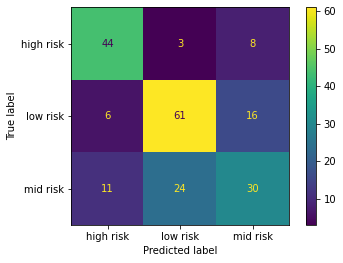

In [40]:
plot_confusion_matrix(grid, scaled_X_test, y_test)
plt.show()

In [41]:
svc_acc = accuracy_score(y_test, svc_pred)
accuracy_list.append(svc_acc * 100)


In [42]:
svc_acc

0.6650246305418719

# LIST OF MODELS

In [43]:
model_list = ["Random Forest", "KNearestNeighbors", "LogisticRegression","SVC"]

In [44]:
model_list

['Random Forest', 'KNearestNeighbors', 'LogisticRegression', 'SVC']

In [45]:
accuracy_list

[81.77339901477832, 77.83251231527095, 63.05418719211823, 66.50246305418719]

In [46]:
print(randomF_acc)
print(knn_acc)
print(lg_acc)
print(svc_acc)

0.8177339901477833
0.7783251231527094
0.6305418719211823
0.6650246305418719


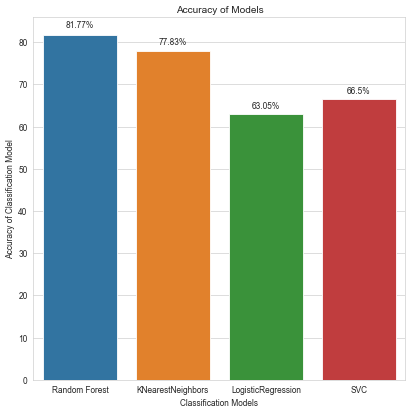

In [83]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(8,8), dpi=60)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()


# choosing of final model

In [50]:
final_model = randomF.fit(X_train, y_train)

In [59]:
pickle.dump(final_model, open('final_model.pkl', 'wb'))

## Saving the model 

In [55]:
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

## Loading of the model

In [58]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

## Testing the saved model on the testing dataset

In [60]:
pickled_model = pickle.load(open('final_model.pkl', 'rb'))
pickled_model.predict(X_test)

array(['low risk', 'high risk', 'mid risk', 'low risk', 'mid risk',
       'low risk', 'mid risk', 'high risk', 'high risk', 'low risk',
       'high risk', 'mid risk', 'mid risk', 'mid risk', 'high risk',
       'low risk', 'mid risk', 'low risk', 'high risk', 'low risk',
       'high risk', 'mid risk', 'mid risk', 'mid risk', 'mid risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'high risk', 'mid risk', 'mid risk', 'high risk',
       'mid risk', 'high risk', 'low risk', 'mid risk', 'high risk',
       'low risk', 'mid risk', 'high risk', 'high risk', 'low risk',
       'low risk', 'mid risk', 'mid risk', 'mid risk', 'mid risk',
       'mid risk', 'mid risk', 'mid risk', 'high risk', 'mid risk',
       'low risk', 'mid risk', 'mid risk', 'high risk', 'high risk',
       'mid risk', 'mid risk', 'mid risk', 'low risk', 'mid risk',
       'mid risk', 'low risk', 'mid risk', 'mid risk', 'low risk',
       'mid risk', 'high risk', 'mid risk', 'l

## Testing the model on a new set of data other than the one for the project

## Importing of dataset

In [62]:
ab = pd.read_csv('new.csv')

In [67]:
ab # This dataset has not been given the target variable

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.00,98,86
1,35,140,90,13.00,98,70
2,29,90,70,8.00,100,80
3,30,140,85,7.00,98,70
4,35,120,60,6.10,98,76
5,23,140,80,7.01,98,70
6,23,130,70,7.01,98,78
7,35,85,60,11.00,102,86
8,32,120,90,6.90,98,70


In [65]:
pickled_model = pickle.load(open('final_model.pkl', 'rb'))
pickled_model.predict(ab)

array(['high risk', 'high risk', 'high risk', 'high risk', 'mid risk',
       'high risk', 'mid risk', 'high risk', 'mid risk'], dtype=object)

# The model has now work on a new set of data other than the dataset for the project.

### Thank you !